# Misophonia Experiment Machine Learning Exploration & Crafting

In [10]:
# Importing Data
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
# Set a random seed
np.random.seed(42)

miso_raw=pd.read_excel("G:\My Drive\Trabajo\MMRES_UPF\MMRES-python-bootcamp2024\datasets\misophoinia_data.xlsx")


<>:10: SyntaxWarning: invalid escape sequence '\M'
<>:10: SyntaxWarning: invalid escape sequence '\M'
C:\Users\andre\AppData\Local\Temp\ipykernel_9888\556559613.py:10: SyntaxWarning: invalid escape sequence '\M'
  miso_raw=pd.read_excel("G:\My Drive\Trabajo\MMRES_UPF\MMRES-python-bootcamp2024\datasets\misophoinia_data.xlsx")


## Data Partioning

In [11]:
from sklearn.model_selection import train_test_split
train_miso, test_miso = train_test_split(miso_raw, test_size=0.2, random_state=42)




## Exploratory Data Analysis

In [14]:
pd.set_option('display.max_columns', None)
train_miso

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,depresion,depresion.dic,Sexo,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
10,no,0.0,divorciado,2.0,25.0,0.0,10.0,0.0,no,0.0,12.50,0.0,H,44.0,I,12.60,3.0,97.0,5.0,NaN,NaN,NaN,-15.0
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
51,si,4.0,casado,1.0,90.0,1.0,99.0,1.0,no,0.0,34.67,1.0,H,41.0,III,-1.00,32.0,76.2,-6.7,0.0,20.0,8.0,9.0
11,si,2.0,casado,1.0,89.0,1.0,97.0,1.0,no,0.0,15.79,0.0,M,32.0,II,19.00,-7.9,109.7,7.5,1.0,12.0,6.0,8.0
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,si,3.0,casado,1.0,85.0,1.0,77.0,1.0,no,0.0,27.37,0.0,H,39.0,III,7.50,5.2,89.1,2.5,2.0,18.0,16.0,-8.0
106,si,4.0,soltero,0.0,90.0,1.0,99.0,1.0,no,0.0,44.00,1.0,M,21.0,III,7.02,25.0,81.2,2.5,0.0,NaN,NaN,9.0
14,si,2.0,soltero,0.0,90.0,1.0,85.0,1.0,no,0.0,5.55,0.0,H,44.0,III,5.40,22.2,87.0,1.6,1.0,12.0,12.0,-5.0
92,no,0.0,divorciado,2.0,60.0,0.0,35.0,0.0,no,0.0,18.05,0.0,H,51.0,I,14.00,23.0,105.0,6.0,NaN,NaN,NaN,-25.0


In [16]:
train_miso.describe()

,Misofonia.dic,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada.dic,depresion,depresion.dic,Edad,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,61.000000,63.000000,63.000000,96.000000
mean,1.604167,1.062500,66.927083,0.635417,65.093750,0.625000,0.083333,17.281667,0.177083,43.614583,10.169792,14.124479,93.552083,3.560729,1.213115,14.984127,12.412698,-1.833333
std,1.380154,0.778832,30.731518,0.483840,31.333546,0.486664,0.277836,11.347573,0.383743,13.803409,5.018265,16.276643,11.749974,3.109843,1.184831,3.841589,5.461404,12.684567
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.000000,19.000000,-1.000000,-16.900000,74.400000,-6.700000,0.000000,5.000000,0.000000,-45.000000
25%,0.000000,1.000000,60.000000,0.000000,38.750000,0.000000,0.000000,8.667500,0.000000,34.000000,7.000000,4.000000,84.800000,2.250000,0.000000,12.000000,11.000000,-8.000000
50%,2.000000,1.000000,80.000000,1.000000,77.000000,1.000000,0.000000,15.045000,0.000000,41.000000,7.955000,12.950000,91.800000,2.900000,1.000000,14.000000,13.000000,0.000000
75%,3.000000,1.250000,89.000000,1.000000,90.000000,1.000000,0.000000,26.910000,0.000000,52.250000,14.137500,21.550000,105.000000,6.250000,2.000000,18.000000,16.500000,5.000000
max,4.000000,3.000000,99.000000,1.000000,99.000000,1.000000,1.000000,44.000000,1.000000,86.000000,21.300000,92.000000,117.900000,9.000000,5.000000,21.000000,20.000000,37.000000


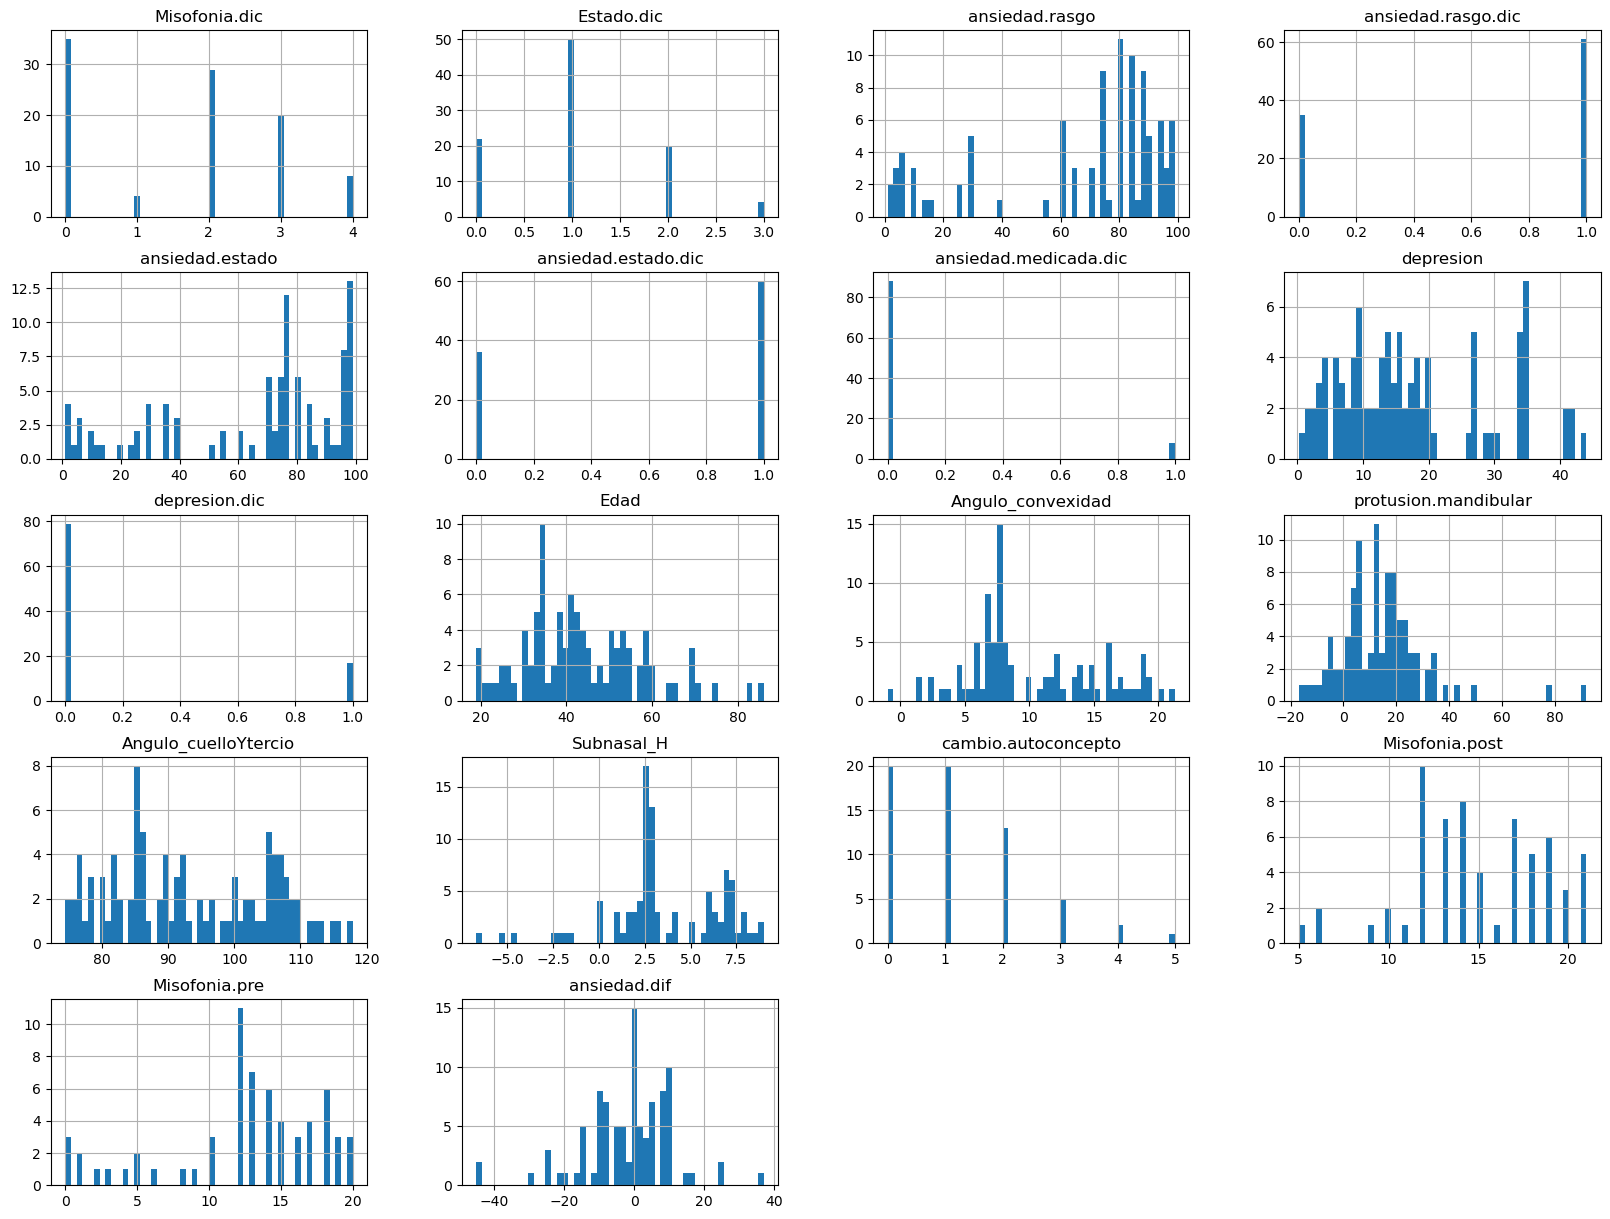

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
train_miso.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["depresion", "Misofonia.dic", "ansiedad.rasgo",
 "ansiedad.estado","Edad","Angulo_convexidad","protusion.mandibular","Angulo_cuelloYtercio","Subnasal_H","ansiedad.dif"]
scatter_matrix(train_miso[attributes], figsize=(12, 8))



### Data Tidying

In [24]:
train_miso

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,depresion,depresion.dic,Sexo,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
10,no,0.0,divorciado,2.0,25.0,0.0,10.0,0.0,no,0.0,12.50,0.0,H,44.0,I,12.60,3.0,97.0,5.0,NaN,NaN,NaN,-15.0
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
51,si,4.0,casado,1.0,90.0,1.0,99.0,1.0,no,0.0,34.67,1.0,H,41.0,III,-1.00,32.0,76.2,-6.7,0.0,20.0,8.0,9.0
11,si,2.0,casado,1.0,89.0,1.0,97.0,1.0,no,0.0,15.79,0.0,M,32.0,II,19.00,-7.9,109.7,7.5,1.0,12.0,6.0,8.0
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,si,3.0,casado,1.0,85.0,1.0,77.0,1.0,no,0.0,27.37,0.0,H,39.0,III,7.50,5.2,89.1,2.5,2.0,18.0,16.0,-8.0
106,si,4.0,soltero,0.0,90.0,1.0,99.0,1.0,no,0.0,44.00,1.0,M,21.0,III,7.02,25.0,81.2,2.5,0.0,NaN,NaN,9.0
14,si,2.0,soltero,0.0,90.0,1.0,85.0,1.0,no,0.0,5.55,0.0,H,44.0,III,5.40,22.2,87.0,1.6,1.0,12.0,12.0,-5.0
92,no,0.0,divorciado,2.0,60.0,0.0,35.0,0.0,no,0.0,18.05,0.0,H,51.0,I,14.00,23.0,105.0,6.0,NaN,NaN,NaN,-25.0


In [59]:

#redundant columns (depresion.dic, Misofonia, Estado, ansiedad.medicada.dic) are removed
miso_tidy_train=train_miso.drop(["depresion.dic", "Misofonia", "Estado", "ansiedad.medicada.dic"], axis=1)
miso_labels=train_miso["depresion"].copy()
#  label column (depresion) is removed
miso_tidy_train.drop("depresion", axis=1)
# Extract numerical column names into a list
num_cols = miso_tidy_train.columns[miso_tidy_train.dtypes != 'object']
# Extract categorical column names into a list
cat_cols = miso_tidy_train.columns[miso_tidy_train.dtypes == 'object']



from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder


num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_cols),
 ("cat", OneHotEncoder(), cat_cols),
 ])

miso_tidy_prepared = full_pipeline.fit_transform(miso_tidy_train)


### Building the Model

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


forest_reg = RandomForestRegressor()
param_distributions = {
 'n_estimators': [int(x) for x in np.linspace(start=3, stop=40, num=10)],
 'max_features': [2,4,6,8,10],
 'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(forest_reg, param_distributions, cv=5,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True,
                                   error_score='raise')  # Add here, not in fit()

random_search.fit(miso_tidy_prepared, miso_labels)

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [3, 7, 11, 15, 19, 23,
                                                         27, 31, 35, 40]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
random_search.best_estimator_.feature_importances_

array([5.91469067e-02, 8.72917295e-03, 5.08566795e-02, 2.24661116e-03,
       6.20553036e-02, 1.80556431e-03, 8.63418132e-05, 4.17238046e-01,
       1.12670340e-01, 1.59438716e-02, 2.25107431e-02, 2.99255517e-02,
       2.86567654e-02, 1.31020828e-02, 1.39125364e-02, 6.25797518e-02,
       1.74302730e-02, 2.42521593e-02, 0.00000000e+00, 1.44747932e-03,
       1.97500422e-03, 5.85133683e-03, 2.19819769e-05, 1.62674245e-03,
       1.17987510e-03, 3.00564516e-02, 1.33773763e-02, 8.22213674e-04,
       2.59690218e-04, 2.33146537e-04])

In [61]:
from sklearn.metrics import mean_squared_error
final_model = random_search.best_estimator_
X_test = test_miso.drop(["depresion.dic", "Misofonia", "Estado", "ansiedad.medicada.dic"], axis=1)
y_test = test_miso["depresion"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

ValueError: Found unknown categories [nan] in column 0 during transform